<a href="https://colab.research.google.com/github/lewisjustin749/Linear-Modeling/blob/main/LinearModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This jupyter notebook is prepared by "Justin Lewis".

# 1. Load Data and perform general EDA 
<ol type="I">
<li>import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)</li>
<li>import the data to a dataframe and show the count of rows and columns (1 pt)</li>
<li>Show the top 5 and last 5 rows (1 pt)</li>
<li>call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)</li>
<ol type="1">
<li>Explain in words about the description of any two variables (1 pt)</li>
</ol>
<li>Show any missing value analysis  (1 pt)</li>
<li> Plot various scatter plots to understand the data:
<ol type="I">
<li>Yearly amount Spent vs Time on Website</li>
<li>Yearly amount Spent vs Time on App</li>
<li>Length of membership vs Time on App</li>
</li>
<li>Generate sns pairplot. Based on the plots, what feature is mostly correlated with the yearly amount spent?</li>
<li>Also, plot sns heatmap based on correlation with annot=True and discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?</li>
<li>Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent</li>
</ol>
</ol>

In [ ]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import missingno as msno 
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")

Saving ecommarce.csv to ecommarce (1).csv


In [ ]:
#=======================================================================================
# Importing the data:
#=======================================================================================

def read_data():
  df = pd.read_csv('ecommarce.csv')
  print("Data Frame data imported successfully!!")
  return df
df = read_data()


Data Frame data imported successfully!!


In [ ]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            500 non-null    int64  
 1   Email                 500 non-null    object 
 2   Address               500 non-null    object 
 3   Credit Card           500 non-null    int64  
 4   Avg. Session Length   500 non-null    float64
 5   Time on App           500 non-null    float64
 6   Time on Website       500 non-null    float64
 7   Length of Membership  500 non-null    float64
 8   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.3+ KB


In [ ]:
df.shape

(500, 9)

In [ ]:
df.head()

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [ ]:
df.tail()

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


In [ ]:
# Unnamed is used for indexing so the column can be removed

df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================
df.describe()

,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


# Explain in words about the description of any two variables

After calling describe, I found that the mean average session length and time on website are very similar. So customers spend about the same amount of time in store and on the website. Maybe the company can make there website a little more simple or have more efficient in store employees to make these mean times lower and deal with more customers that way.

Insights:

* Average customer has been a customer for about 4 years.
* No customer spends 40+ minutes receiving in-store style advice during a session.
* Customers spend about 1/2 the time on the mobile app compared to the website to place orders for clothes.
* Sales for the company seem to be exceedingly low since the max yearly amount spent does not exceed $1000. Possibly goal of company is to sell cheap and affordable clothing

In [ ]:
#=======================================================================================
# Discovering the categorical data distribution :
#=======================================================================================

df.describe(include = ["O"])

,Email,Address
count,500,500
unique,500,500
top,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131"
freq,1,1


Insights:
* There are no duplicate values in any categorical features

In [ ]:
#=======================================================================================
# Discovering the features:
#=======================================================================================
numerical_columns = df.select_dtypes(include = [np.number])
print(numerical_columns.columns.values)

['Credit Card' 'Avg. Session Length' 'Time on App' 'Time on Website'
 'Length of Membership' 'Yearly Amount Spent']


In [ ]:
#=======================================================================================
# Discovering the features:
#=======================================================================================
categorical_columns = df.select_dtypes(include = [np.object])
print(categorical_columns.columns.values)

['Email' 'Address']


In [ ]:
#=======================================================================================
# Null Value Analysis:
#=======================================================================================
missingvalues = df.isnull().sum() 
missingvalues.sort_values(inplace = True, ascending = False)
missingvalues

Email                   0
Address                 0
Credit Card             0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

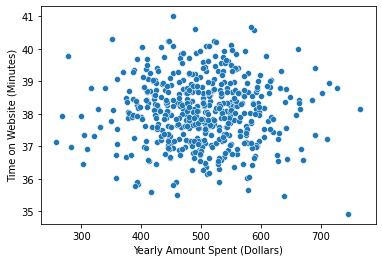

In [ ]:
sns.scatterplot(x=df['Yearly Amount Spent'], y= df['Time on Website'] , data=df);
plt.ylabel('Time on Website (Minutes)');
plt.xlabel('Yearly Amount Spent (Dollars)');

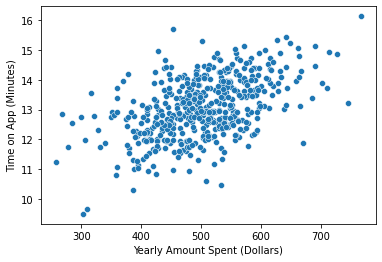

In [ ]:
sns.scatterplot(x=df['Yearly Amount Spent'], y= df['Time on App'] , data=df);
plt.ylabel('Time on App (Minutes)');
plt.xlabel('Yearly Amount Spent (Dollars)');

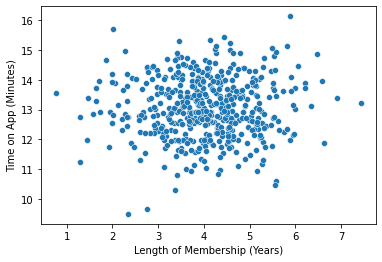

In [ ]:
sns.scatterplot(x=df['Length of Membership'], y= df['Time on App'] , data=df);
plt.ylabel('Time on App (Minutes)');
plt.xlabel('Length of Membership (Years)');

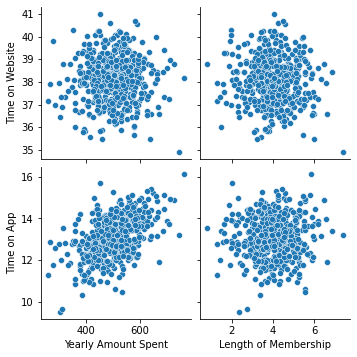

In [ ]:
sns.pairplot(df,
            x_vars=["Yearly Amount Spent", "Length of Membership"],
            y_vars=["Time on Website", "Time on App"]);

# Based on the plots, what feature is mostly correlated with the yearly amount spent?

Based on the pairplot, Time on the App is more positively correlated to Yearly Amount Spent since that scatter plot visually is closer to forming a linear line (y = x) then the feature Time on Website.

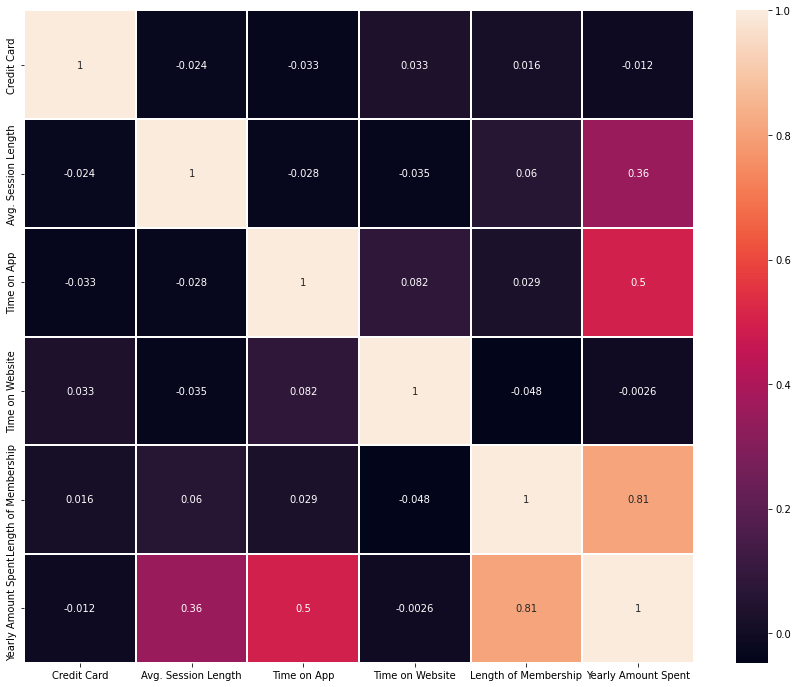

In [ ]:
plt.figure(figsize = (15, 12))
correlation = df.corr()
heat_map = sns.heatmap( correlation, linewidth = 1 , annot = True)

# Discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?

Based on the heatmap, I would remove the credit card column since it has the least (most negative) correlation with yearly amount spent and have a low (negative) correlations with the other features as well. Time on website is negatively correlated with yearly spent but is almost negligible.

* Length of the membership has the highest correlation with yearly amount spent and time on app comes second.
* Long term members spend less time on the website and use the app more often.
* Avg session time is negatively correlated with time on app/website which makes sense since more session time picking out outfits in store eqautes to finding the items quicker when placing the order.

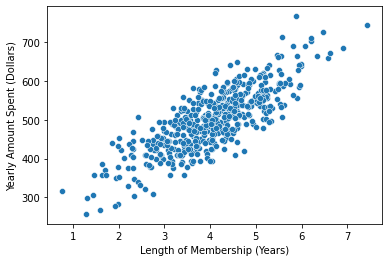

In [ ]:
sns.scatterplot(x=df['Length of Membership'], y= df['Yearly Amount Spent'] , data=df);
plt.ylabel('Yearly Amount Spent (Dollars)');
plt.xlabel('Length of Membership (Years)');

# 2 Feature Selection and Pre-processing
Based on the EDA and null analysis, drop the unnecessary columns for the regression

In [ ]:
df.drop('Credit Card', inplace=True, axis=1)

In [ ]:
df.head()

,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",35.497268,13.655651,40.577668,4.582621,588.951054
1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",32.926272,12.109461,38.268959,3.164034,393.204933
2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",34.000915,12.330278,38.110597,4.604543,488.547505
3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",35.305557,14.717514,37.721283,3.620179,582.852344
4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",34.330673,13.795189,38.536653,4.946308,600.406092


# 3 X/Y and Training/Test Split
Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 101 \\
As we will be doing gradient descent as well as some other regression technique, scaling the data set is important. So, use sklearn's StandardScaler for scalling the X of training and test sets. But don't do it for y(target) train and test. [For help, you can see the answer for this question: https://stackoverflow.com/questions/38780302/predicting-new-data-using-sklearn-after-standardizing-the-training-data

In [ ]:
feature_columns = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']].columns

In [ ]:
feature_columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [ ]:
X = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']].values.reshape(-1, 4)
y = df['Yearly Amount Spent'].values.reshape(-1, 1);

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 101)



# 4 Training Linear Model using SKLearn's LinearRegression 
<ol type="I">
<li>Train a linear model using Sklearn''s LinearRegression (example in the linear regression slide/colab links in webcourses)</li>
<li>After training, show the coefficients and intercept</li>
<li>Predict for the test data </li>
<li>Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis </li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics) </li>
<li>Interpretation: Interpret the coefficient and which coefficient belongs to 
which feature and based on that explain any strategy that should help the business</li>
</ol>

In [ ]:
lr=LinearRegression() 
lr.fit(X_train , y_train)
print("intercept:",lr.intercept_)
print("coefficients:",lr.coef_)

intercept: [500.53166775]
coefficients: [[25.76252659 38.32855202  0.19220992 61.17355707]]


In [ ]:
model_coefficients = lr.coef_
coefficients_df = pd.DataFrame(data = model_coefficients.reshape([4,1]),
                              index = feature_columns,
                              columns = ['Coefficient value']
                              )
print(coefficients_df)

# Going forward we use the same theta values to test the other algorithms so this is the only time
# I will display what feature relates to the theta value since other algorithms produce similar theta values
# Refer back here if you forget

                      Coefficient value
Avg. Session Length           25.762527
Time on App                   38.328552
Time on Website                0.192210
Length of Membership          61.173557


In [ ]:
y_pred = lr.predict(X_test);

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  457.441861
1    402.033135  403.720053
2    411.069611  410.253154
3    600.406092  592.431034
4    587.155870  591.014373
..          ...         ...
145  480.731938  479.300766
146  489.387526  485.410296
147  462.112248  458.590999
148  408.704548  412.526576
149  376.398455  376.479006

[150 rows x 2 columns]


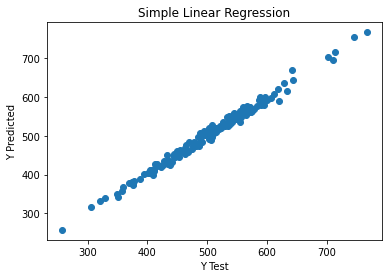

In [ ]:
plt.scatter(y_test,y_pred);
plt.title('Simple Linear Regression');
plt.xlabel("Y Test");
plt.ylabel("Y Predicted");

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root mean squared error: {rmse:.2f}')

R2 = r2_score(y_test, y_pred)
print(f'R^2: {R2:.3f}')

Mean absolute error: 7.23
Mean squared error: 79.81
Root mean squared error: 8.93
R^2: 0.989


In [ ]:
lr.score(X_train, y_train)

0.9817562058732432

Insights on results:
* Our model is testing well with the test data, explaining it 98% of the time based on the R^2 value
* The model also explains the training data well with a 98% score
* MAE and RMSE are close to zero but MSE is relatively high due to the any large errors made in the model. 

# Interpretation: Interpret the coefficient and which coefficient belongs to which feature and based on that explain any strategy that should help the business

The coefficients are for Avg. Session Length, Time on App, Time on Website, and Length of Membership in that order.

* Length of Membership contains the highest slope (theta value)
* Time on website has a slope close to zero and shows that area of the business needs help to increase yearly money spent.

What the business can do is update their website to make it more user friendly for people who enter the site. They also can include sales and promotional offers on their website that will draw in more customers increase time on website. The business can have more sales / promotions to have more customers in store and increase the yearly money spent for customers. When making those changes to the website and retesting new data in the future we can check if the theta value for time on website has increased.

# 5 Normal Equation 
(while solving this, you might need to convert your dataframe into various different data structures such as to_numpy(), might need to reshape, perform Transpose, add x0 columns, etc. I would recommend you to see the colab link I have shown you in the class and try to compare the shape of x and y and their data to get an idea during this process. Also, the code and discussion in the slide will help. \\
<ol type="I">
<li>Implement Normal Equation and find best_theta values based on the training set</li>
<li>Display the theta values. Are they very close to the sklearn's linear regression?</li>
<li>Prepare the test set before prediction</li>
<li>Perform prediction for the test set</li>
<li>Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>What is the limitation of using the Normal equation for regression?</li>
</ol>

In [ ]:
X_b = np.c_[np.ones(len(X_train)), X_train]  # add x0 = 1 to each instance
theta_Normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [ ]:
print(theta_Normal)

[[5.00531668e+02]
 [2.57625266e+01]
 [3.83285520e+01]
 [1.92209922e-01]
 [6.11735571e+01]]


#Display the theta values. Are they very close to the sklearn's linear regression?

The theta values are close to sklearn's linear regression values if not the same.

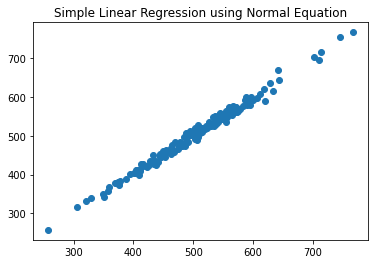

In [ ]:
# Adding x0=1 to each instance.

X_new_b = np.c_[np.ones(len(X_test)), X_test]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_Normal)

plt.scatter(y_test,y_predict);
plt.title('Simple Linear Regression using Normal Equation');



In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  457.441861
1    402.033135  403.720053
2    411.069611  410.253154
3    600.406092  592.431034
4    587.155870  591.014373
..          ...         ...
145  480.731938  479.300766
146  489.387526  485.410296
147  462.112248  458.590999
148  408.704548  412.526576
149  376.398455  376.479006

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_predict)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_predict)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.23
Mean Square Error: 79.81
Root Mean Squared Error: 8.93
R^2: 0.989


Insights:
* Using the Normarl Equation we obtained the same results as using the Linear Regression algorithm.

# What is the limitation of using the Normal equation for regression?

The limitation is that training a Linear Regression model 
when there are hundreds of thousands of features is very slow using a normal equation

# 6 Batch Gradient Descent
<ol type="I">
<li>Implement Batch Gradient Descent based on the way we have learned in the class (See sample code form pdf). You can play with eta and n_iterations and should set to reasonable eta and number of iterations so that you can get the thetas close to Normal equation's theta</li>
<li>Display the theta values. Are they very close to the sklearn's linear regression?</li>
<li>Also plot step number (in x-axis) against the cost(y axis). See an example from this colab link : https://colab.research.google.com/drive/19_UoIFfIBx-nofDFs7Pw7ZB8gVw5yQLe?usp=sharing (Links to an external site.)</li>
<li>Perform Prediction for the test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>Short Question: How do derivatives help in the process of gradient descent?</li>
<li>Short Question: What are the benefits and the limitations of using batch gradient descent? </li>
</ol>

In [ ]:
cost_list = []
epoch_list = []
predicted_list = []

eta =  0.01 # learning rate
n_iterations = 1000
m = 100


theta_batch = np.random.randn(5,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_batch) - y_train)
    theta_batch = theta_batch - eta * gradients
    
    y_predicted = np.dot(theta_batch.T, X_b.T)
    cost = np.mean(np.square(y_test-y_predicted)) # MSE (Mean Squared Error)
        
    if iteration%10==0:
      cost_list.append(cost)
      epoch_list.append(iteration)

In [ ]:
theta_batch

array([[5.00531668e+02],
       [2.57625266e+01],
       [3.83285520e+01],
       [1.92209922e-01],
       [6.11735571e+01]])

# Display the theta values. Are they very close to the sklearn's linear regression?

Yes they are very close to the sklearn's linear regression

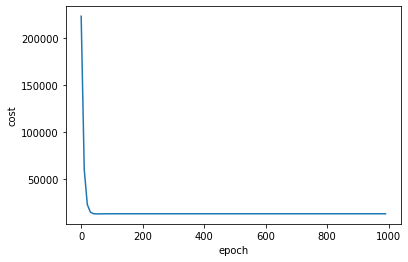

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list);

In [ ]:
X_new_b_GD = np.c_[np.ones(len(X_test)), X_test]  # add x0 = 1 to each instance
y_predict_GD = X_new_b_GD.dot(theta_batch)

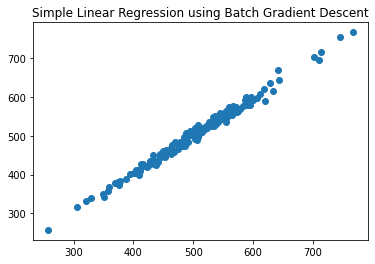

In [ ]:
plt.scatter(y_test,y_predict_GD);
plt.title('Simple Linear Regression using Batch Gradient Descent');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict_GD.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  457.441861
1    402.033135  403.720053
2    411.069611  410.253154
3    600.406092  592.431034
4    587.155870  591.014373
..          ...         ...
145  480.731938  479.300766
146  489.387526  485.410296
147  462.112248  458.590999
148  408.704548  412.526576
149  376.398455  376.479006

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_predict_GD)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_predict_GD)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_predict_GD))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_predict_GD)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.23
Mean Square Error: 79.81
Root Mean Squared Error: 8.93
R^2: 0.989


Insights:
* Using Batch Gradient Descent produced similar results as using the normal and linear regression algorithms.

#Short Question: How do derivatives help in the process of gradient descent?

The Derivatives give us the slope of a function at a point, which in turns helps determine the step size to reach the target.

#Short Question: What are the benefits and the limitations of using batch gradient descent?

The benefit of batch gradient descent is that it uses the whole training set at every step. Its major limitation is that it is terribly slow on very large data sets and there are much faster gradient descent algorithms available.

# 7 Stochastic Gradient Descent
<ol type="I">
<li>Implement Stochastic Gradient Descent and train our data set. You must have to use learning_schedule (see example code in pdf as well as the colab link I have shared in #6 above. The parameters should be reasonable and the theta values should be very close to the normal equation</li>
<li>Display the theta values. Are they very close to the sklearn's linear regression?</li>
<li>Also plot step number (in x-axis) against cost(y-axis). See an example from this colab link : https://colab.research.google.com/drive/19_UoIFfIBx-nofDFs7Pw7ZB8gVw5yQLe?usp=sharing (Links to an external site.)</li>
<li>Perform Prediction for the test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>Short Question: What are the benefits and the limitations of using batch gradient descent?</li>
</ol>

In [ ]:

cost_list = []
epoch_list = []

n_epochs = 1000
t0, t1 = 40, 75 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(5,1) # random initialization
i=0
for epoch in range(n_epochs):
  if i==101:
    i = 0
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients

  y_predicted = np.dot(theta.T, X_b.T)
  cost = np.mean(np.square(y_test-y_predicted)) # MSE (Mean Squared Error)
        
  if epoch%10==0:
    cost_list.append(cost)
    epoch_list.append(epoch)

theta_SGD = theta

In [ ]:
theta_SGD

array([[511.77378445],
       [  1.7371722 ],
       [ -9.96228158],
       [  7.72079038],
       [ -1.08705894]])

# Display the theta values. Are they very close to the sklearn's linear regression?

I am able to get a similar intercept value of around 500 but I am unable to get the correct values for the theta values. So I know when making predictions I expect there to be a lot of error. When I rerun the cell I tend to get inconsistent values so that adds more reason to see error.

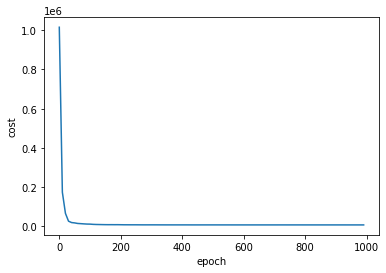

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
X_new_b_SGD = np.c_[np.ones(len(X_test)), X_test]  # add x0 = 1 to each instance
y_predict_SGD = X_new_b_SGD.dot(theta_SGD)

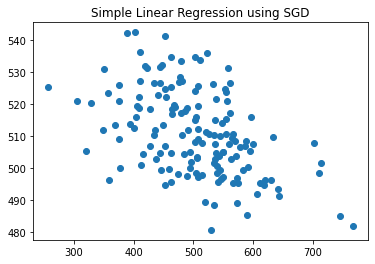

In [ ]:
plt.scatter(y_test,y_predict_SGD);
plt.title('Simple Linear Regression using SGD');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict_SGD.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  494.797378
1    402.033135  542.449665
2    411.069611  527.343258
3    600.406092  507.458568
4    587.155870  506.883224
..          ...         ...
145  480.731938  527.204450
146  489.387526  497.698059
147  462.112248  525.257246
148  408.704548  522.259750
149  376.398455  525.907531

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_predict_SGD)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_predict_SGD)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_predict_SGD))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_predict_SGD)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 72.98
Mean Square Error: 8601.01
Root Mean Squared Error: 92.74
R^2: -0.185


Insights:
* As previously stated I am obseriving high error in all three metrics.
* Also only 3% of the test data is being explained by the SGD model which is a terrible result. Over 90% of the test data is not being explained by the model so I need to make changes to the algorithm to explain more test data. 
* Sometimes the R^2 value turns out negative which shows that test data isnt being explained.

#Short Question: What are the benefits and the limitations of using batch gradient descent?

The benefit of batch gradient descent is that it uses the whole training set at every step. Its major limitation is that it is terribly slow on very large data sets and there are much faster gradient descent algorithms available.

# 8 SGDRegressor from sklearn
<ol type= "I">
<li>Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation</li>
<li>Display the theta values. Are they very close to sklearn's linear regression?</li>
<li>Predict for the test data</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([500.83010426]),
 array([25.60519923, 37.69028726,  1.11408282, 60.68115069]))

Insights:
* The intercept and theta values are similar except the theta relating to Time on Website which increased slightly.

In [ ]:
theta_new_SGD = np.append(sgd_reg.intercept_, sgd_reg.coef_)
print(theta_new_SGD)

[500.83010426  25.60519923  37.69028726   1.11408282  60.68115069]


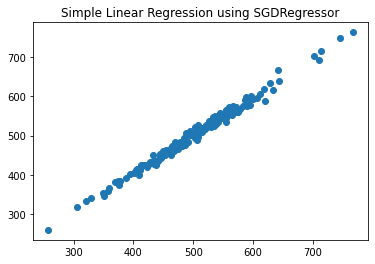

In [ ]:
X_new_b_SGD_ = np.c_[np.ones(len(X_test)), X_test]  # add x0 = 1 to each instance
y_predicted_SGD_= X_new_b_SGD_.dot(theta_new_SGD) 
plt.scatter(y_test, y_predicted_SGD_);
plt.title('Simple Linear Regression using SGDRegressor');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predicted_SGD_.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  458.242156
1    402.033135  407.129959
2    411.069611  412.473214
3    600.406092  592.192784
4    587.155870  590.661142
..          ...         ...
145  480.731938  480.506255
146  489.387526  484.533665
147  462.112248  459.435064
148  408.704548  414.722152
149  376.398455  378.427570

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_predicted_SGD_)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_predicted_SGD_)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_predicted_SGD_))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_predicted_SGD_)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.37
Mean Square Error: 81.87
Root Mean Squared Error: 9.05
R^2: 0.989


Insight:
* No significant changes that drastically affects the R^2 score after time on website's theta value slightly increased.
* Still seeing similar theta values.

# 9 Mini-batch Gradient Descent
Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.


# Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.

At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches, which gives a performance boost over SGD. The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large minibatches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD.

# 10 Polynomial of degree 2
<ol type= "I">
<li>Use sklearn's Polynomial features to degree = 2 on our training and test set</li>
<li>Use linearRegression on the new polynomial features</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_2 = poly_features.fit_transform(X_train)
X_poly_test_2 = poly_features.fit_transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train_2, y_train)
lin_reg.intercept_, lin_reg.coef_


(array([500.49414369]),
 array([[ 2.56324041e+01,  3.83930621e+01,  1.40993709e-01,
          6.12010238e+01, -8.38261559e-01, -1.61454843e-01,
         -6.96974957e-02,  1.53178741e-01,  4.04112605e-01,
         -2.24521389e-01,  4.19382892e-02,  5.97272276e-01,
         -3.66429892e-01, -4.27833581e-02]]))

In [ ]:
y_pred_poly2 = lin_reg.predict(X_poly_test_2);

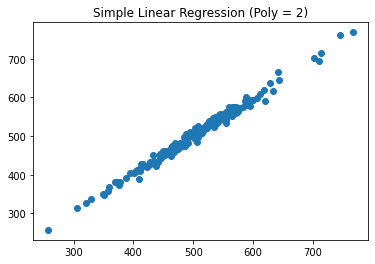

In [ ]:
plt.scatter(y_test,y_pred_poly2);
plt.title('Simple Linear Regression (Poly = 2)');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_poly2.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  461.142472
1    402.033135  406.996787
2    411.069611  409.151568
3    600.406092  592.451373
4    587.155870  590.373352
..          ...         ...
145  480.731938  479.375556
146  489.387526  486.344897
147  462.112248  459.567385
148  408.704548  413.757127
149  376.398455  376.505749

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred_poly2)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred_poly2)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly2))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_pred_poly2)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.43
Mean Square Error: 85.35
Root Mean Squared Error: 9.24
R^2: 0.988


In [ ]:
lin_reg.score(X_poly_train_2,y_train)

0.9820835851742825

Insights:
* All the error metrics increased slightly and the R^2 score descreased slightly but not a concerning amount. It still stays similar to previous results.

# 11 Polynomial of degree 3
<ol type= "I">
<li>Use sklearn's Polynomial features to degree = 3 on our training and test set</li>
<li>Use linearRegression on the new polynomial features</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train_3 = poly_features.fit_transform(X_train)
X_poly_test_3 = poly_features.fit_transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train_3, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([500.52588338]),
 array([[25.66180088, 37.73817386,  1.71438477, 61.53147374, -0.9027249 ,
         -0.18506912,  0.13999095,  0.62340699,  0.22250795, -0.35852515,
         -0.23855601,  0.65188939, -0.62388113,  0.0795928 ,  0.08363636,
         -0.35101308, -0.10954996,  0.40875869,  0.13211318, -0.64021488,
          0.28780793, -0.28538261,  0.66323145, -0.36183884, -0.09354415,
         -0.48873914, -0.28292754,  1.1650947 ,  0.55789041,  0.47209095,
         -0.34630194, -1.07106588, -0.41258377,  0.15717302]]))

In [ ]:
y_pred_poly3 = lin_reg.predict(X_poly_test_3);

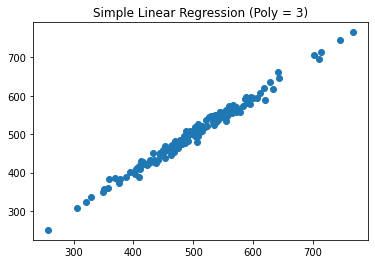

In [ ]:
plt.scatter(y_test,y_pred_poly3);
plt.title('Simple Linear Regression (Poly = 3)');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_poly3.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  469.210206
1    402.033135  397.714061
2    411.069611  408.403371
3    600.406092  592.902976
4    587.155870  591.695435
..          ...         ...
145  480.731938  479.548868
146  489.387526  486.597376
147  462.112248  460.248131
148  408.704548  417.572561
149  376.398455  376.928893

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred_poly3)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred_poly3)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly3))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_pred_poly3)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.70
Mean Square Error: 94.97
Root Mean Squared Error: 9.75
R^2: 0.987


In [ ]:
lin_reg.score(X_poly_train_3,y_train)

0.9827524357032815

Insights:
* Similar results as previous models.
* MSE is very close to 100 which can become a problem with the data

# 12 Learning Curve
<ol type= "I">
<li>Generate learning curve with linearRegression</li>
<li>Generate learning curve with polynomial regression with degree  = 5</li>
<li>Interpret the result</li>
</ol>

In [ ]:

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.legend(loc="upper right", fontsize=14)   # not shown in the book
  plt.xlabel("Training set size", fontsize=14) # not shown
  plt.ylabel("RMSE", fontsize=14)              # not shown

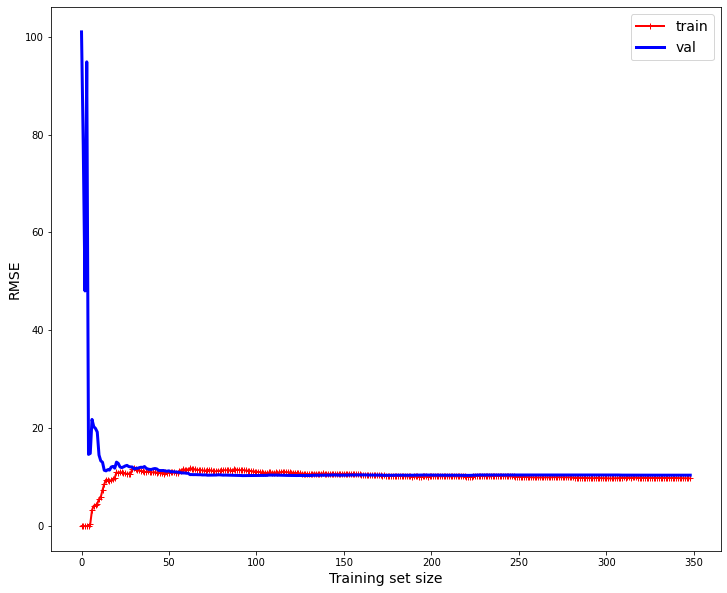

In [ ]:
plt.figure(figsize = (12,10))
X = np.array(df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']])
y = np.array(df['Yearly Amount Spent']);
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()     

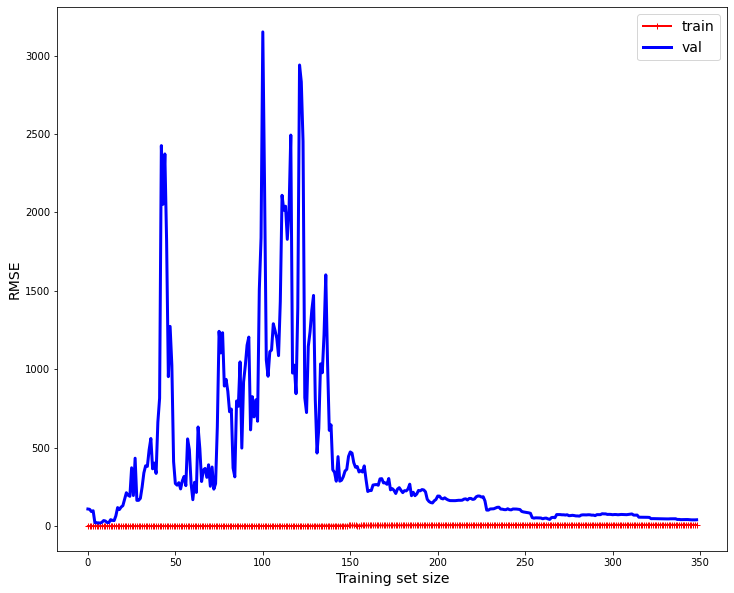

In [ ]:
from sklearn.pipeline import Pipeline
plt.figure(figsize = (12,10))
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)), ("lin_reg", LinearRegression()),])

plot_learning_curves(polynomial_regression, X, y)
plt.show() 

# 13 Regularization
Explain the purpose of regularization
For the following Regularization method, use the polynomial degree 3 data set

#Explain the purpose of regularization For the following Regularization method, use the polynomial degree 3 data set

 Regularization is used to overcome Overfitting for a regression model. In  regularization we constrain a model to make it simpler and reduce the risk of overfitting. The fewer degrees of freedom it has, the harder it will be for it to overfit the data.  a simple way to regularize a polynomial model is to reduce the number of polynomial degrees. In regularization, what we do is normally we keep the same number of features, but reduce the 
magnitude of the coefficients (weights of the model).

# 14 Ridge Regression
<ol type= "I">
<li>Use sklearn's Ridge to train the data set (use the polynomial degree 3 data set)</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=3, solver="cholesky") #Cholesky uses a variant of the close form
ridge_reg.fit(X_poly_train_3, y_train)
y_predict_ridge = ridge_reg.predict(X_poly_test_3)


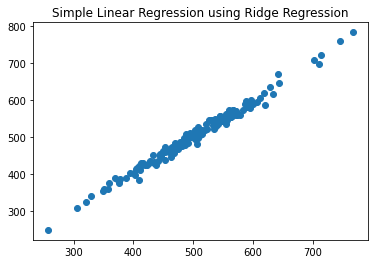

In [ ]:
plt.scatter(y_test,y_predict_ridge);
plt.title('Simple Linear Regression using Ridge Regression');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict_ridge.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  471.105462
1    402.033135  396.089835
2    411.069611  408.890977
3    600.406092  589.632138
4    587.155870  589.724071
..          ...         ...
145  480.731938  479.830919
146  489.387526  486.590833
147  462.112248  461.613327
148  408.704548  419.861948
149  376.398455  379.502616

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_predict_ridge)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_predict_ridge)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_predict_ridge))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_predict_ridge)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 8.26
Mean Square Error: 107.23
Root Mean Squared Error: 10.36
R^2: 0.985


In [ ]:
ridge_reg.score(X_poly_train_3, y_train)

0.982401026121326

Insights:
* Error is increasing again and MSE has now exceeding 100 which is very concerning.

# 15 SGDRegressor  for Ridge
<ol type= "I">
<li>Use sklearn's SGDRegressor for Ridge Regression</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [ ]:
sgd_reg = SGDRegressor(penalty="l2") #L2
sgd_reg.fit(X_train, y_train)
y_predict_sgdridge = sgd_reg.predict(X_test);
y_predict_sgdridge = y_predict_sgdridge.reshape(150,1)


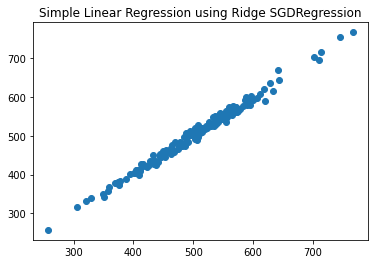

In [ ]:
plt.scatter(y_test,y_predict_sgdridge);
plt.title('Simple Linear Regression using Ridge SGDRegression');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict_sgdridge.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  457.350365
1    402.033135  403.747035
2    411.069611  410.252594
3    600.406092  592.375894
4    587.155870  590.954513
..          ...         ...
145  480.731938  479.310317
146  489.387526  485.372908
147  462.112248  458.616998
148  408.704548  412.512973
149  376.398455  376.497801

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_predict_sgdridge)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_predict_sgdridge)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_predict_sgdridge))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_predict_sgdridge)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.23
Mean Square Error: 79.85
Root Mean Squared Error: 8.94
R^2: 0.989


In [ ]:
sgd_reg.score(X_train, y_train)

0.9817559131482524

Insights:
* Now results are now closer to the linear regression and normal models.
* MSE has decreased under 100 from the previous model.

# 16 Lasso Regression
<ol type= "I">
<li>Use sklearn's Lasso</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>How Lasso perform the regularization and how does that affect the thetas?</li>
</ol>

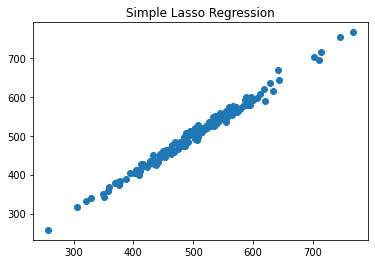

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
plt.scatter(y_test,y_pred_lasso);
plt.title('Simple Lasso Regression');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_lasso.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  457.339337
1    402.033135  403.804708
2    411.069611  410.436884
3    600.406092  592.184072
4    587.155870  590.862640
..          ...         ...
145  480.731938  479.413623
146  489.387526  485.555702
147  462.112248  458.757733
148  408.704548  412.582304
149  376.398455  376.756620

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_pred_lasso)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.24
Mean Square Error: 80.16
Root Mean Squared Error: 8.95
R^2: 0.989


In [ ]:
lasso_reg.score(X_train, y_train)

0.9817492954384373

Insights:
*  Results close to previous models.

#How Lasso perform the regularization and how does that affect the thetas?

Lasso is another regularized version of Linear Regression, just like Ridge Regression, it adds a regularization term to the cost function, but it uses the 
ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm. An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features. This affects the thetas by lowering it slightly since the feature with the lowest correlation to the target is reduced to zero.

# 17 Elastic Net
<ol type= "I">
<li>Use sklearn's ElasticNet </li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test in x axis and y predicted in y axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE and R^2  (see documentation of sklearn's metrics)</li>
<li>How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?</li>
</ol>

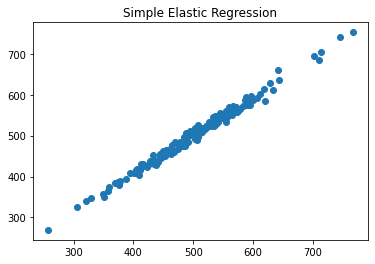

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)
plt.scatter(y_test,y_pred_elastic);
plt.title('Simple Elastic Regression');

In [ ]:
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_elastic.squeeze()})
print(results)

         Actual   Predicted
0    453.315675  459.072642
1    402.033135  408.744141
2    411.069611  414.856532
3    600.406092  587.808241
4    587.155870  586.562963
..          ...         ...
145  480.731938  480.602573
146  489.387526  486.004560
147  462.112248  460.857881
148  408.704548  416.804885
149  376.398455  382.704638

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred_elastic)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred_elastic)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_pred_elastic)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 8.25
Mean Square Error: 102.75
Root Mean Squared Error: 10.14
R^2: 0.986


In [ ]:
elastic_net.score(X_train, y_train)

0.9793337948594473

Insights:
*  Results close to previous models.
* MSE jumped back to over 100 

#How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?

ElasticNet uses regularization to reduce the magnitude of coefficients in our model. ElasticNet is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to 
Lasso Regression. Elastic net is different from lasso and ridge since only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero and since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated, Elastic net is preferred over lasso. It affects theta by reducing useless weights down to zero thus slightly lowering the theta values.


# 18 Bonus Question:
In most of the above cases, for example, LinearRegression of sklearn, (Q4 above), we have used scaled data set for training. However, in a real-life scenario, you would like to predict the yearly amount spent for a new instance. The real data will not be scaled. How would you use the model for this case to predict this instance? [35.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961] = ? \\
Write necessary code so that it will predict a reasonable value for the amount spent. This is very close to our first training record.

In [ ]:
X = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [ ]:
lr_bonus=LinearRegression() 
lr_bonus.fit(X_train , y_train)
print("intercept:",lr_bonus.intercept_)
print("coefficients:",lr_bonus.coef_)

intercept: -1142.3344442767707
coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


In [ ]:
model_coefficients = lr_bonus.coef_
coefficients_df = pd.DataFrame(data = model_coefficients.reshape(4,1), 
                              index = feature_columns, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                      Coefficient value
Avg. Session Length           25.981550
Time on App                   38.590159
Time on Website                0.190405
Length of Membership          61.279097


In [ ]:
y_pred_bounsQ = lr_bonus.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_bounsQ})
print(results)

         Actual   Predicted
18   453.315675  457.441861
361  402.033135  403.720053
104  411.069611  410.253154
4    600.406092  592.431034
156  587.155870  591.014373
..          ...         ...
147  480.731938  479.300766
346  489.387526  485.410296
423  462.112248  458.590999
17   408.704548  412.526576
259  376.398455  376.479006

[150 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred_bounsQ)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred_bounsQ)
print(f'Mean Square Error: {mse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_bounsQ))
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 = r2_score(y_test, y_pred_bounsQ)
print(f'R^2: {R2:.3f}')

Mean Absolute Error: 7.23
Mean Square Error: 79.81
Root Mean Squared Error: 8.93
R^2: 0.989


In [ ]:
lr_bonus.score(X_train, y_train)

0.9817562058732432

In [ ]:
y_pred_bounsQ = lr_bonus.predict([[35.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961]])

In [ ]:
print(f'Predicted yearly amount spend by this customer: {y_pred_bounsQ[0]:.2f}')

Predicted yearly amount spend by this customer: 526.04
